# 6'' 3D FPU with SLIM style spectrometer

C.Zhang

10/25/2022

## Geometry constraints
### 1. Filter bank
Use SLIM baseline design: 
- 120-180 GHz, R=300 with oversampling of 1.6 -> 200 detectors per filter-bank. 
- 2 polarizations per spatial pixel. 
- **A single filter bank has a 6x33 mm2 footprint. Spacing between filter bank is assumed to be 3/4$\lambda$(150GHz) for now, which is 1.5 mm.** The 1/4 or 3/4  $\lambda$ spacing was for detectors along a feedline, but I'm using it for between filter banks.

### 2. Pixel
- So, for a typical pixel spacing of ~1.5 F\*Lambda, we have “optimal” values of 6 mm @ 95 GHz, 4 mm @ 150 GHz, 2.5 mm @ 250 GHz. However this doesn’t matter too much. (?)
- 10 mm horn diameter. 
- **Pixel-pixel gap is 1.5 mm for now.** (To be honest, I'm quite confused by the notes and Pete's slides. I'm afraid there may be some conflicts between the three points listed here. They may not make any sense...).

### 3. Total size
- Use 130 mm for pixel.
- Use 140 mm for spectrometers.
- Nothing should goes beyond 200 mm.
- Things goes on a single 6'' wafer should stay within 140 mm.





In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from pylab import * 

g=1.5
d=10
h,l = 6, 33

def addoneHex(ax,L,pos=np.array([0,0]),rot=0,color='k',fill=False,fcolor='w',label=None):
    X0 = np.array([[L,0],[L/2.,sqrt(3)*L/2.],[-L/2.,sqrt(3)*L/2.],[-L,0],[-L/2.,-sqrt(3)*L/2.],[L/2.,-sqrt(3)*L/2.]])
    RM = gen_rotmatx_deg(theta=rot)
    X = np.dot(X0,RM)
    X[:,0] += pos[0]
    X[:,1] += pos[1]
    ax.add_patch(plt.Polygon(X, edgecolor=color, facecolor=fcolor,fill=fill))
    if label:
        ax.text(pos[0],pos[1],label,c=color,ha='center', va='center')
    return X

def gen_rotmatx_deg(theta=0):
    rad = np.radians(theta)
    c, s = np.cos(rad), np.sin(rad)
    RM = np.array(((c, -s), (s, c)))
    return RM

def addonepixel(ax,d=10,pos=np.array([0,0]),color='k',fill=False,fcolor='w',label=None):
    ax.add_patch(plt.Circle(pos, d/2., edgecolor=color,facecolor=fcolor, fill=fill))
    if label:
        ax.text(pos[0],pos[1],label,c=color,ha='center', va='center')
    return pos
    
def addoneFB(ax,h=6,l=33,pos=np.array([0,0]),rot=0,color='k',fill=False,fcolor='w',label=None):
    #h,l = 6, 33
    X0 = np.array([[l/2.,h/2.],[-l/2.,h/2.],[-l/2.,-h/2.],[l/2.,-h/2.]])
    RM = gen_rotmatx_deg(theta=rot)
    X = np.dot(X0,RM)
    X[:,0] += pos[0]
    X[:,1] += pos[1]
    ax.add_patch(plt.Polygon(X, edgecolor=color, facecolor=fcolor,fill=fill))
    if label:
        ax.text(pos[0],pos[1],label,c=color,ha='center', va='center')
    return X

## Explore some elements design

In [2]:
# Area ratio between pixel and FB
Apix=np.pi*(d+g)**2/4
Afb =2*(h+g)*(l+g)
print([Apix,Afb])

# center area has D ~ 70 mm (2xl + margin)
Dc = 70.
Ac = np.pi*Dc**2/4
Hc = Dc**2/2.*3.*np.sqrt(3)/4
print(Ac/Afb)
print(Hc/Afb)
#def make_FB_hex_array(N=3,h=6,l=33,g=1.5):
#    N = math.ceil(N/3.)*3
#    if N<3:
#        return None
#    n = N/3.
    

[103.86890710931253, 517.5]
7.436620291106274
6.150035476150361


In [3]:
# initiate pixel and FB list

pixellist=[]
ipixel=0
FBlist=[]
iFB=0

In [ ]:
# first layer



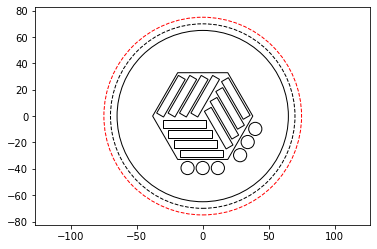

In [17]:
# Second layer

fig, ax = plt.subplots()
ax.add_patch(plt.Circle((0, 0), 130/2., edgecolor='k', fill=False))
ax.add_patch(plt.Circle((0, 0), 140/2., edgecolor='k', linestyle='--', fill=False))
ax.add_patch(plt.Circle((0, 0), 150/2., edgecolor='r', linestyle='--', fill=False))

Dc = 76.
Dc0=Dc
addoneHex(ax,Dc/2)

# second layer pixels
pos0=np.array([0,-np.sqrt(3)*Dc/4.-g-d/2.])
for i in range(-1,2):
    pos0=np.array([i*(g+d),-np.sqrt(3)*Dc/4.-g-d/2.])
    pixellist.append(addonepixel(ax,d,pos0,label=''))
    ipixel += 1
    RM=gen_rotmatx_deg(-60)
    pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),label=''))
    ipixel += 1

# second layer FBs
rots=np.linspace(0,360,3,endpoint=False)
dx,dy = -(h+g)/np.sqrt(3), h+g
for j in range (4):
    pos0=np.array([-Dc/4.+g+l/2.+j*dx,-Dc/4.*np.sqrt(3)+g+h/2.+j*dy]) # 
    for i in range(3):
        RM=gen_rotmatx_deg(rots[i])
        FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i],label=''))
        iFB += 1
        
#addonepixel(ax,d,[-(d+g)/2,-(np.sqrt(3)*Dc0/4.+g+d/2.+np.sqrt(3)*(d+g)/2)],label='')
#addonepixel(ax,d,[-(d+g),-(np.sqrt(3)*Dc0/4.+g+d/2.+np.sqrt(3)*(d+g))],label='')
#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.show()



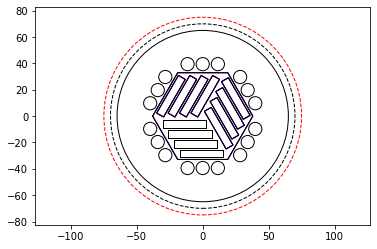

In [5]:
# Second layers

fig, ax = plt.subplots()
ax.add_patch(plt.Circle((0, 0), 130/2., edgecolor='k', fill=False))
ax.add_patch(plt.Circle((0, 0), 140/2., edgecolor='k', linestyle='--', fill=False))
ax.add_patch(plt.Circle((0, 0), 150/2., edgecolor='r', linestyle='--', fill=False))

Dc = Dc0
c=['r','b','k']

for k in range(3):
    drot=120
    addoneHex(ax,Dc/2,rot=k*drot,fill=False,color=c[k])

    # second layer pixels
    pos0=np.array([0,-np.sqrt(3)*Dc/4.-g-d/2.])
    for i in range(-1,2):
        pos0=np.array([i*(g+d),-np.sqrt(3)*Dc/4.-g-d/2.])
        RM=gen_rotmatx_deg(k*drot)
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),label=''))
        ipixel += 1
        RM=gen_rotmatx_deg(-60+k*drot)
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),label=''))
        ipixel += 1
        
    # second layer FBs
    rots=np.linspace(0,360,3,endpoint=False)+k*drot
    dx,dy = -(h+g)/np.sqrt(3), h+g
    for j in range (4):
        pos0=np.array([-Dc/4.+g+l/2.+j*dx,-Dc/4.*np.sqrt(3)+g+h/2.+j*dy]) # 
        for i in range(3):
            RM=gen_rotmatx_deg(rots[i])
            #FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i],label='%d'%iFB))
            FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i],fill=False,color=c[k],label=''))
            iFB += 1
            
#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.show()


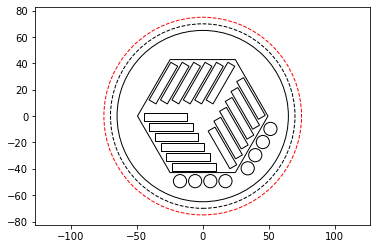

In [6]:
# Thrid layer

fig, ax = plt.subplots()
ax.add_patch(plt.Circle((0, 0), 130/2., edgecolor='k', fill=False))
ax.add_patch(plt.Circle((0, 0), 140/2., edgecolor='k', linestyle='--', fill=False))
ax.add_patch(plt.Circle((0, 0), 150/2., edgecolor='r', linestyle='--', fill=False))

#Dc = (np.sqrt(3)*Dc0/4.+2*g+d)*4/np.sqrt(3)
Dc=(np.sqrt(3)*Dc0/4.+g+d/2.+np.sqrt(3)*(d+g)/2-(g+d/2.))*4/np.sqrt(3)
addoneHex(ax,Dc/2)

# third layer pixels
pos0=np.array([0,-np.sqrt(3)*Dc/4.-g-d/2.])
for i in range(-2,2):
    pos0=np.array([(i+0.5)*(g+d),-np.sqrt(3)*Dc/4.-g-d/2.])
    pixellist.append(addonepixel(ax,d,pos0,label=''))
    ipixel += 1
    RM=gen_rotmatx_deg(-60)
    pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),label=''))
    ipixel += 1

# third layer FBs
rots=np.linspace(0,360,3,endpoint=False)
dx,dy = -(h+g)/np.sqrt(3), h+g
for j in range (6):
    pos0=np.array([-Dc/4.+g+l/2.+j*dx,-Dc/4.*np.sqrt(3)+g+h/2.+j*dy]) # 
    if j==5:
        pos0[0] += 0
    for i in range(3):
        RM=gen_rotmatx_deg(rots[i])
        #FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i],label='%d'%iFB))
        FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i],label=''))
        iFB += 1
        
#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.show()

Dc1=Dc

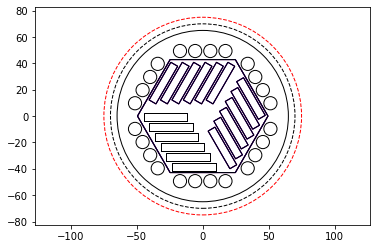

In [34]:
# Third layers

fig, ax = plt.subplots()
ax.add_patch(plt.Circle((0, 0), 130/2., edgecolor='k', fill=False))
ax.add_patch(plt.Circle((0, 0), 140/2., edgecolor='k', linestyle='--', fill=False))
ax.add_patch(plt.Circle((0, 0), 150/2., edgecolor='r', linestyle='--', fill=False))

#Dc = (np.sqrt(3)*Dc0/4.+2*g+d)*4/np.sqrt(3)
Dc=(np.sqrt(3)*Dc0/4.+g+d/2.+np.sqrt(3)*(d+g)/2-(g+d/2.))*4/np.sqrt(3)
addoneHex(ax,Dc/2)

c=['r','b','k']

for k in range(3):
    drot=120
    addoneHex(ax,Dc/2,rot=k*drot, color=c[k])
    
    # third layer pixels
    pos0=np.array([0,-np.sqrt(3)*Dc/4.-g-d/2.])
    for i in range(-2,2):
        pos0=np.array([(i+0.5)*(g+d),-np.sqrt(3)*Dc/4.-g-d/2.])
        RM=gen_rotmatx_deg(k*drot)
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),label=''))
        ipixel += 1
        RM=gen_rotmatx_deg(-60+k*drot)
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),label=''))
        ipixel += 1
        
    # third layer FBs
    rots=np.linspace(0,360,3,endpoint=False)+k*drot
    dx,dy = -(h+g)/np.sqrt(3), h+g
    for j in range (6):
        pos0=np.array([-Dc/4.+g+l/2.+j*dx,-Dc/4.*np.sqrt(3)+g+h/2.+j*dy]) # 
        if j==5:
            pos0[0] += 0
        for i in range(3):
            RM=gen_rotmatx_deg(rots[i])
            FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i],color=c[k],label=''))
            iFB += 1
        
#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.show()

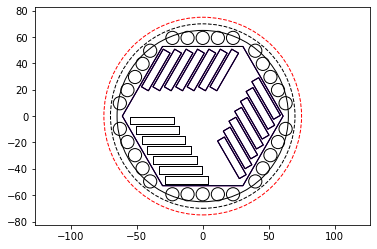

In [36]:
# Fourth layer

fig, ax = plt.subplots()
ax.add_patch(plt.Circle((0, 0), 130/2., edgecolor='k', fill=False))
ax.add_patch(plt.Circle((0, 0), 140/2., edgecolor='k', linestyle='--', fill=False))
ax.add_patch(plt.Circle((0, 0), 150/2., edgecolor='r', linestyle='--', fill=False))

Dc=(np.sqrt(3)*Dc0/4.+g+d/2.+np.sqrt(3)*(d+g)-(g+d/2.))*4/np.sqrt(3)

c=['r','b','k']

for k in range(3):
    drot=120
    addoneHex(ax,Dc/2,rot=k*drot, color=c[k])
    
    # fourth layer pixels
    pos0=np.array([0,-np.sqrt(3)*Dc/4.-g-d/2.])
    for i in range(-2,3):
        pos0=np.array([i*(g+d),-np.sqrt(3)*Dc/4.-g-d/2.])
        RM=gen_rotmatx_deg(k*drot)
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),label=''))
        ipixel += 1
        RM=gen_rotmatx_deg(-60+k*drot)
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),label=''))
        ipixel += 1
        
    # fourth layer FBs
    rots=np.linspace(0,360,3,endpoint=False)+k*drot
    dx,dy = -(h+g)/np.sqrt(3), h+g
    for j in range (7):
        pos0=np.array([-Dc/4.+g+l/2.+j*dx,-Dc/4.*np.sqrt(3)+g+h/2.+j*dy]) # 
        if j==7:
            pos0[0] += 4.5
        if j==8:
            pos0[0] += 12
        for i in range(3):
            RM=gen_rotmatx_deg(rots[i])
            FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i],color=c[k],label=''))
            iFB += 1
    
    #RM=gen_rotmatx_deg(k*drot)
    #FBlist.append(addoneFB(ax,h,l,pos=np.dot([0,0],RM),rot=k*drot+90,color=c[k],label=''))
    #iFB += 1
    #FBlist.append(addoneFB(ax,h,l,pos=np.dot([g+h,0],RM),rot=k*drot+90,color=c[k],label=''))
    #iFB += 1
    #FBlist.append(addoneFB(ax,h,l,pos=np.dot([-g-h,0],RM),rot=k*drot+90,color=c[k],label=''))
    #iFB += 1
        
#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.show()


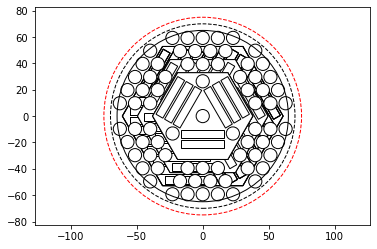

In [35]:
# All layers

fig, ax = plt.subplots()
ax.add_patch(plt.Circle((0, 0), 130/2., edgecolor='k', fill=False))
ax.add_patch(plt.Circle((0, 0), 140/2., edgecolor='k', linestyle='--', fill=False))
ax.add_patch(plt.Circle((0, 0), 150/2., edgecolor='r', linestyle='--', fill=False))

c=['k','grey','grey']

# fourth layer
Dc=(np.sqrt(3)*Dc0/4.+g+d/2.+np.sqrt(3)*(d+g)-(g+d/2.))*4/np.sqrt(3)
for k in range(3):
    drot=120
    addoneHex(ax,Dc/2,rot=k*drot, color=c[k])
    
    # fourth layer pixels
    pos0=np.array([0,-np.sqrt(3)*Dc/4.-g-d/2.])
    for i in range(-2,3):
        pos0=np.array([i*(g+d),-np.sqrt(3)*Dc/4.-g-d/2.])
        RM=gen_rotmatx_deg(k*drot)
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),label=''))
        ipixel += 1
        RM=gen_rotmatx_deg(-60+k*drot)
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),label=''))
        ipixel += 1
        
    # fourth layer FBs
    rots=np.linspace(0,360,3,endpoint=False)+k*drot
    dx,dy = -(h+g)/np.sqrt(3), h+g
    for j in range (9):
        pos0=np.array([-Dc/4.+g+l/2.+j*dx,-Dc/4.*np.sqrt(3)+g+h/2.+j*dy]) # 
        if j==7:
            pos0[0] += 4.5
        if j==8:
            pos0[0] += 12
        for i in range(3):
            RM=gen_rotmatx_deg(rots[i])
            FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i],color=c[k],label=''))
            iFB += 1
    
    RM=gen_rotmatx_deg(k*drot)
    FBlist.append(addoneFB(ax,h,l,pos=np.dot([0,0],RM),rot=k*drot+90,color=c[k],label=''))
    iFB += 1
    FBlist.append(addoneFB(ax,h,l,pos=np.dot([g+h,0],RM),rot=k*drot+90,color=c[k],label=''))
    iFB += 1
    FBlist.append(addoneFB(ax,h,l,pos=np.dot([-g-h,0],RM),rot=k*drot+90,color=c[k],label=''))
    iFB += 1

# third layer
Dc=(np.sqrt(3)*Dc0/4.+g+d/2.+np.sqrt(3)*(d+g)/2-(g+d/2.))*4/np.sqrt(3)
for k in range(3):
    drot=120
    addoneHex(ax,Dc/2,rot=k*drot, fill=True,color=c[k])
    
    # third layer pixels
    pos0=np.array([0,-np.sqrt(3)*Dc/4.-g-d/2.])
    for i in range(-2,2):
        pos0=np.array([(i+0.5)*(g+d),-np.sqrt(3)*Dc/4.-g-d/2.])
        RM=gen_rotmatx_deg(k*drot)
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),fill=True,label=''))
        ipixel += 1
        RM=gen_rotmatx_deg(-60+k*drot)
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),fill=True,label=''))
        ipixel += 1
        
    # third layer FBs
    rots=np.linspace(0,360,3,endpoint=False)+k*drot
    dx,dy = -(h+g)/np.sqrt(3), h+g
    for j in range (6):
        pos0=np.array([-Dc/4.+g+l/2.+j*dx,-Dc/4.*np.sqrt(3)+g+h/2.+j*dy]) # 
        if j==5:
            pos0[0] += 0
        for i in range(3):
            RM=gen_rotmatx_deg(rots[i])
            FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i],color=c[k],fill=True,label=''))
            iFB += 1

# second layer
Dc=Dc0
for k in range(3):
    drot=120
    addoneHex(ax,Dc/2,rot=k*drot,fill=True,color=c[k])

    # second layer pixels
    pos0=np.array([0,-np.sqrt(3)*Dc/4.-g-d/2.])
    for i in range(-1,2):
        pos0=np.array([i*(g+d),-np.sqrt(3)*Dc/4.-g-d/2.])
        RM=gen_rotmatx_deg(k*drot)
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),fill=True,label=''))
        ipixel += 1
        RM=gen_rotmatx_deg(-60+k*drot)
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),fill=True,label=''))
        ipixel += 1
        
    # second layer FBs
    rots=np.linspace(0,360,3,endpoint=False)+k*drot
    dx,dy = -(h+g)/np.sqrt(3), h+g
    for j in range (4):
        pos0=np.array([-Dc/4.+g+l/2.+j*dx,-Dc/4.*np.sqrt(3)+g+h/2.+j*dy]) # 
        for i in range(3):
            RM=gen_rotmatx_deg(rots[i])
            #FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i],label='%d'%iFB))
            FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i],fill=True,color=c[k],label=''))
            iFB += 1

# first layer

addoneHex(ax,Dc/2,rot=k*drot,fill=True,color=c[k])

# first layer pixels
pixellist.append(addonepixel(ax,d,[0,0],fill=True,label=''))
ipixel += 1
rots=np.linspace(0,360,3,endpoint=False)
pos0=np.array([0,-np.sqrt(3)*Dc/4.+g+d/2.])
for i in range(3):
        RM=gen_rotmatx_deg(rots[i]+60)
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),fill=True,label=''))
        ipixel += 1
        
# first layer FBs
rots=np.linspace(0,360,3,endpoint=False)
dx,dy = 0, h+g
for j in [0,1,2]:
    pos0=np.array([0,-Dc/4.*np.sqrt(3)+g+h/2.+j*dy]) # 
    for i in range(3):
        
        RM=gen_rotmatx_deg(rots[i])
        if j==0 and i==0:
            #FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i],fill=True,color=c[k],fcolor='grey',label=''))
            #iFB += 1
            continue
        else:
            FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i],fill=True,color=c[k],label=''))
            iFB += 1
            
#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.show()